In [1]:
import numpy as np
import pandas as pd


In [2]:
from types import prepare_class
class Linear_Regression:

#initiating the parameters(learning_rate,no_of_iterations)

  def __init__(self, learning_rate, no_of_iterations:int):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  def fit(self, X, Y):
    #number of training examples and number of features
    self.m, self.n = X.shape #no of rows and no of cols

    #initiating weights and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    #implementing gradient descent
    
    for i in range(self.no_of_iterations):
      self.update_weights()



  def update_weights(self):
    Y_prediction = self.predict(self.X)
    #calculate gradient
    dw = - (2 * self.X.T).dot(self.Y - Y_prediction )/ self.m
    db = - 2 * np.sum(self.Y - Y_prediction)/ self.m
    #update weights
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db



  def predict(self, X):
    return X.dot(self.w) + self.b





In [3]:
df = pd.read_csv('salary_data.csv')


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
!pip install matplotlib

In [6]:
import matplotlib.pyplot as plt

In [7]:
# checking for missing values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
# splitting the featue and target
X = df[['YearsExperience']]
X.shape
X
Y = df['Salary']
Y.shape

(30,)

In [9]:
#splitting dataset into training and test data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.33,random_state=2)

In [10]:
model = Linear_Regression(learning_rate=0.02,no_of_iterations=1000)


In [11]:
model.fit(X_train,Y_train)

In [14]:
#printing final weight n bias values
print(model.w[0])
print(model.b)

9678.240934826092
23059.226262816675


/var/folders/ck/tj_z0jk1249ggvdcqp5pk2200000gn/T/ipykernel_2052/99217920.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(model.w[0])


predicting values for test data

In [15]:
predict_y = model.predict(X_test)

In [16]:
print(predict_y)

1      35640.939478
0      33705.291291
14     66611.310470
9      58868.717722
21     91774.736900
19     81128.671872
23    102420.801928
6      52093.949067
3      42415.708132
20     88871.264620
5      51126.124974
27    115970.339237
12     61772.190002
4      44351.356319
10     60804.365909
16     72418.255030
28    122745.107892
25    110163.394676
17     74353.903217
2      37576.587665
7      54029.597254
dtype: float64


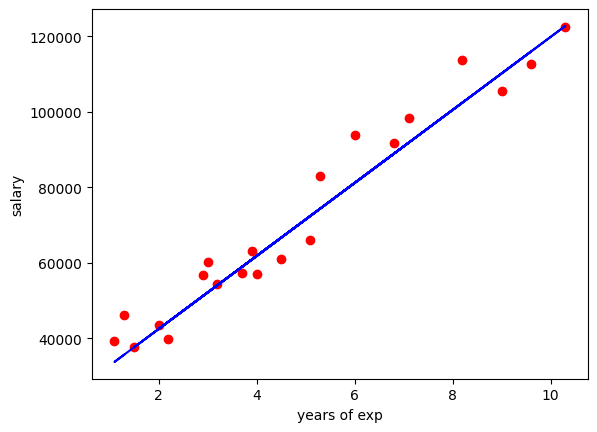

In [18]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,predict_y,color='blue')
plt.xlabel('years of exp')
plt.ylabel('salary')
plt.show()